In [16]:
using BenchmarkTools
using DataFrames
using DelimitedFiles
using CSV
using XLSX
using Downloads

Downloading the data from the web

In [2]:
P = Downloads.download("https://raw.githubusercontent.com/nassarhuda/easy_data/master/programming_languages.csv",
    "./data/programming_languages.csv")

"./data/programming_languages.csv"

Reading the text file

In [3]:
# using the DelimitedFiles which is a standard library
P, H = readdlm("./data/programming_languages.csv", ',';header=true)
P
# P is the content by itself and H is the header

73×2 Matrix{Any}:
 1951  "Regional Assembly Language"
 1952  "Autocode"
 1954  "IPL"
 1955  "FLOW-MATIC"
 1957  "FORTRAN"
 1957  "COMTRAN"
 1958  "LISP"
 1958  "ALGOL 58"
 1959  "FACT"
 1959  "COBOL"
    ⋮  
 2007  "Clojure"
 2009  "Go"
 2010  "Rust"
 2011  "Dart"
 2011  "Kotlin"
 2011  "Red"
 2011  "Elixir"
 2012  "Julia"
 2014  "Swift"

Writting to a text file

In [4]:
writedlm("./data/programming_languages_dml.csv", P, '-')

Reaing the data using the CSV and loading as a DataFrame

In [5]:
C = CSV.read("./data/programming_languages.csv", DataFrame)

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [6]:
@show typeof(C)

typeof(C) = DataFrame


DataFrame

In [7]:
C[1:10,:]

Row,year,language
,Int64,String31
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN
6,1957,COMTRAN
7,1958,LISP
8,1958,ALGOL 58
9,1959,FACT


In [8]:
C[!,:year]

73-element Vector{Int64}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
    ⋮
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

In [9]:
C.year

73-element Vector{Int64}:
 1951
 1952
 1954
 1955
 1957
 1957
 1958
 1958
 1959
 1959
    ⋮
 2007
 2009
 2010
 2011
 2011
 2011
 2011
 2012
 2014

In [10]:
@show typeof(P)

typeof(P) = Matrix{Any}


Matrix{Any} (alias for Array{Any, 2})

In [11]:
names(C)

2-element Vector{String}:
 "year"
 "language"

In [12]:
describe(C)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,year,1982.99,1951,1986.0,2014,0,Int64
2,language,,ALGOL 58,,dBase III,0,String31


Using a tool from BenchmarkTools tools to calculate the time to import the librari thoughout theses two different methods

In [13]:
@btime P,H = readdlm("./data/programming_languages.csv",',';header=true);
@btime C = CSV.read("./data/programming_languages.csv", DataFrame);

  3.218 ms (319 allocations: 50.59 KiB)


  3.349 ms (446 allocations: 48.66 KiB)


Rwitting with the CSV

In [14]:
CSV.write("./data/programming_languages_CSV.csv", DataFrame(P, :auto))

"./data/programming_languages_CSV.csv"

In [26]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using PyCall
using MLBase

In [28]:
D = dataset("datasets", "faithful")

Row,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [29]:
@show names(D)

names(D) = ["Eruptions", "Waiting"]


2-element Vector{String}:
 "Eruptions"
 "Waiting"

In [30]:
describe(D)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


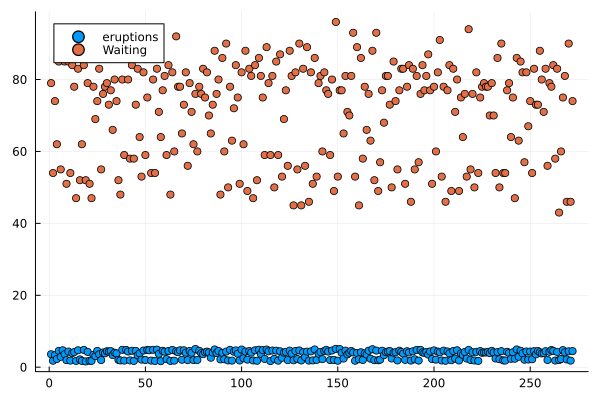

In [33]:
eruptions = D[!, :"Eruptions"]
scatter(eruptions, label="eruptions")
waittime = D[!, :"Waiting"]
scatter!(waittime, label="Waiting")

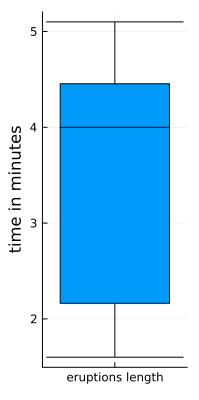

In [35]:
boxplot(["eruptions length"], eruptions, legend = false, size=(200,400), whisker_width=1, ylabel="time in minutes")

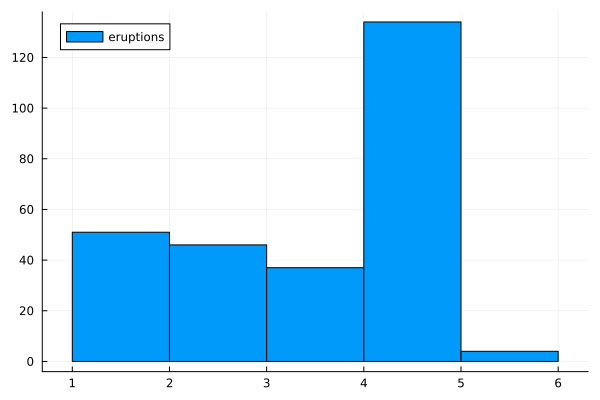

In [36]:
histogram(eruptions, label="eruptions")

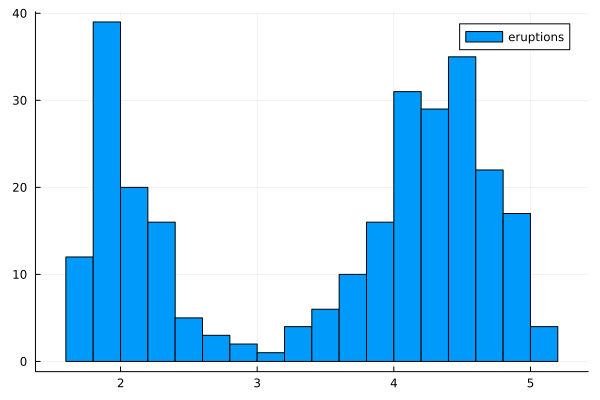

In [40]:
histogram(eruptions, bins=:sqrt, label="eruptions")

In [6]:
function myshow(y)
    println("the value is $y")
end

myshow (generic function with 1 method)

In [7]:
a = 1
b = 2

2

In [8]:
myshow(a + b)

the value is 3


In [13]:
@macroexpand @show y

quote
    Base.println("y = ", Base.repr(begin
                #= show.jl:1047 =#
                local var"#67#value" = y
            end))
    var"#67#value"
end

In [14]:
Base.remove_linenums!(@macroexpand @show y)

quote
    Base.println("y = ", Base.repr(begin
                local var"#68#value" = y
            end))
    var"#68#value"
end

In [15]:
@time(ℯ)

  0.000002 seconds


ℯ = 2.7182818284590...

In [ ]:
function f(x, y ,⊕) # \oplus
    return x+y 
end

In [16]:
code = Meta.parse("j=i^2") # it represents a julian expression

:(j = i ^ 2)

In [17]:
typeof(code)

Expr

In [18]:
dump(code)

Expr
  head: Symbol =
  args

: Array{Any}((2,))
    1: Symbol j
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol ^
        2: Symbol i
        3: Int64 2


In [20]:
code.head

:(=)

In [21]:
code.args

2-element Vector{Any}:
 :j
 :(i ^ 2)

In [22]:
using Statistics

In [23]:
calories = [144, 151, 157, 170, 152, 145, 175, 149, 99, 113, 140, 102, 135, 149, 149, 68, 136, 144, 72, 97]
difference = [-4, -7, -3, -4, -6, -1, 1, 8, -8, 1]

10-element Vector{Int64}:
 -4
 -7
 -3
 -4
 -6
 -1
  1
  8
 -8
  1

In [24]:
mean(calories)

132.35

In [33]:
using Pkg
using CairoMakie
using KernelDensity
using Makie
using Plotly
using StatsBase
using TypedTables